In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import pandas as pd
import collections

In [2]:
BASE_FOLDER = 'experiments_sigma2'

In [3]:
COL_T = 0
COL_THETA = 1
COL_SIGMA = 2
COL_J = 3
COL_GRAD_K = 4
COL_GRAD_SIGMA = 5
COL_GRAD_MIXED = 6
COL_ALPHA = 7
COL_UPDATE_GRAD = 8

### Experiment types
0. : ONLY_THETA
1. : THETA_AND_SIGMA
2. : THETA_AND_MIXED
3. : LOCAL_STEP_LENGTH
4. : FAR_SIGHTED_STEP
5. : ONLY_DELTA


In [4]:
col_to_legend = {0:'Timestep', 
                 1:'Theta', 
                 2:'Sigma', 
                 3:'J', 
                 4:'Grad_k', 
                 5:'Grad_sigma', 
                 6:'Grad_mixed', 
                 7:'Alpha', 
                 8:'Update gradient'}

In [5]:
COL_PARAM_TYPE = 0           
COL_PARAM_THETA = 1
COL_PARAM_SIGMA = 2
COL_PARAM_ALPHA_SIGMA = 3
COL_PARAM_ITERATIONS = 4
COL_PARAM_EPS = 5
COL_PARAM_FILENAME = 6

In [6]:
experiments = []
for experiment in glob.glob(os.path.join(BASE_FOLDER, '*_params.npy')):
    params = np.load(experiment)
    experiments.append(list(params))

In [7]:
experiments_df = pd.DataFrame(experiments, columns=['EXP_TYPE', 'THETA', 'SIGMA', 'ALPHA_SIGMA', 'MAX_ITERATIONS', 'EPS', 'FILENAME'])

In [8]:
def load_from_dataframe(df):
    return [np.load(f) for f in df['FILENAME'].values]
        

In [9]:
def filter_experiments(**kwargs):
    df_filtered = experiments_df
    for k,v in kwargs.items():
        if v is not None:
            try:
                if isinstance(v, list):
                    df_filtered = df_filtered[df_filtered[k.upper()].isin(v)]
                else:
                    df_filtered = df_filtered[df_filtered[k.upper()] == v]
            except:
                pass
    return df_filtered

In [10]:
def my_plot(**kwargs):
    data_params = filter_experiments(**kwargs)
    data_params = data_params.sort_values(by=list(data_params.columns))

    data = load_from_dataframe(data_params)

    plt.rcParams["figure.figsize"] = (15,13)
    
    def plot_lines(**kwargs):
        if 'max_t' in kwargs:
            MAX_T = kwargs['max_t']
        else:
            MAX_T = -1

        if isinstance(kwargs['value'], list):
            params = kwargs
            ll = len(kwargs['value'])
            i = 1
            for v in kwargs['value']:
                plt.subplot((ll + 1)//2, 2, i)
                i+=1
                params['value'] = v
                plot_lines(**params)
        else:
            for d in data:
                x = d[0:MAX_T,COL_T]
                y = d[0:MAX_T,kwargs['value']]
                plt.plot(x, y)
                plt.xlabel('Timesteps')
                plt.ylabel(col_to_legend[kwargs['value']])
                plt.title(col_to_legend[kwargs['value']])

    plot_lines(**kwargs)
    
    # Build legend
    
    free_vars = []
    for k,v in kwargs.items():
        if v is None or (k.upper() in data_params.columns and isinstance(v, list)):
            free_vars.append(k)

    free_vars = [s.upper() for s in free_vars]

    legend = [' '.join(map(lambda x : ': '.join(x), zip(data_params.loc[:,free_vars].columns.values, s))) for s in data_params.loc[:,free_vars].values]

    plt.legend(legend, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        

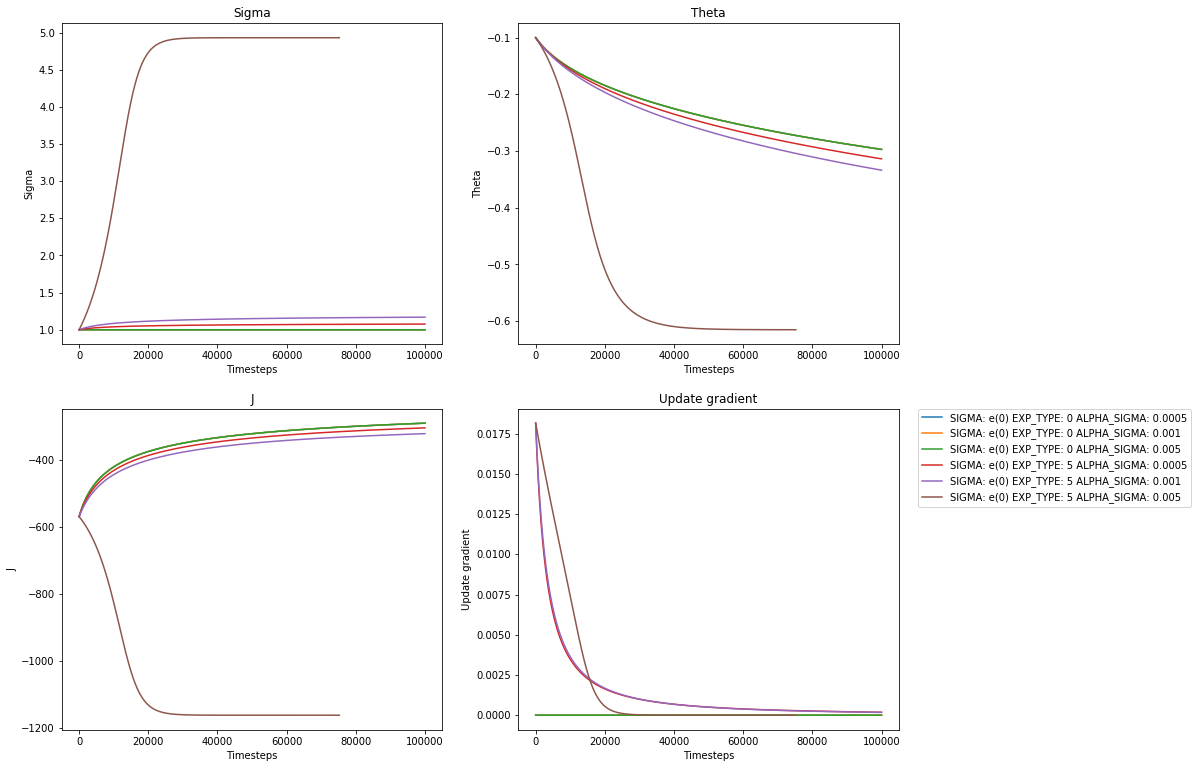

In [11]:
my_plot(EXP_TYPE=['0', '5'], 
        THETA='-0.1', 
        alpha_sigma = ['0.0005', '0.001', '0.005'], 
        sigma=['e(0)'],
        value=[COL_SIGMA, COL_THETA, COL_J, COL_UPDATE_GRAD], 
        max_t=-1)


